In [128]:
# b = 2*pi/(Vx[max1] - Vx[max0] ) = 2*pi/( (N-1)*(Vx[maxN]-Vx[max0]))
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def Pw2(x):
    return np.power(x,2)

def f_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    f = pi*np.sqrt(Rm)/(1-Rm)
    return f

def cr_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    cr = Pw2( (1+Rm)/(1-Rm) )
    return cr



In [129]:
# formule per i fit


def f_fit(coo,scoo):
    f = pi*sqrt(coo/4)
    sf = pi/(4*np.sqrt(coo))
    return f,sf

def cr_fit(coo,scoo = 0):
    cr = 1+coo
    dcr = scoo
    return cr,dcr

def coo_th(R1,R2):
    coo = 4*(f_th(R1,R2)/pi)**2
    return coo

In [130]:
R_m = [[0.80,0.85],[0.85,0.85],[0.90,0.90],[0.92,0.95],[0.95,0.95]]
name = ['Data2/8085.csv','Data2/8585.csv','Data2/9090.csv','Data2/9295.csv','Data2/9595_cut.csv']
title = ['R: 80-85','R: 85-85','R: 90-90','R: 92-95','R: 95-95']
div = [0.05,0.05,0.025,0.025,0.025]
bounds_min =[[0,2,5,-5,-1000],  
             [5,1,8.5,-10,-1000],
             [5,2.2,2.5,-1,-1000],
             [1,0,1.5,-10,-100],
             [10,0,2,-10,-1000]]
bounds_max =[[100,3,8,5,1000],
             [200,3,10,10,1000],
             [1000,3,4,10,1000],
             [200,5,2,10,100],
             [200,5,2.3,10,1000]] 



def Airy_fit(x,coo,b,a,phi,c):
    I = a/(1+coo*Pw2(np.sin(b*(x+phi)))) + c
    return I

Finesse_fit  = np.asarray([])
C_Ratio_fit  = np.asarray([])
Finesse_th  = np.asarray([])
C_Ratio_th  = np.asarray([])

R = 0.8 | 0.85
f theory = 16.266713635982587
f fit    = 10.555881319032423 +- 0.11687328730304952
cr theory = 108.24076133623181
cr fit    = 46.15951233433388 +- 0.4753740074539964


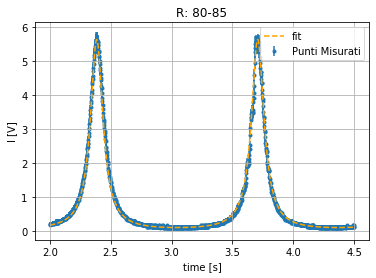

R = 0.85 | 0.85
f theory = 19.309368757650553
f fit    = 15.287852904665787 +- 0.08069809134281045
cr theory = 152.1111111111111
cr fit    = 95.72251852724774 +- 0.9286679499729236


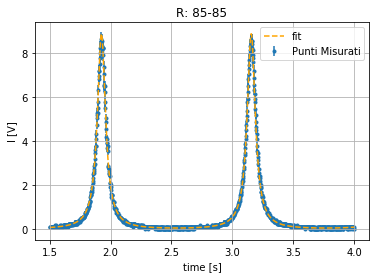

R = 0.9 | 0.9
f theory = 29.803764797388308
f fit    = 22.89320899852626 +- 0.05388936737595803
cr theory = 361.0000000000001
cr fit    = 213.40933149959133 +- 1.8615517611614982


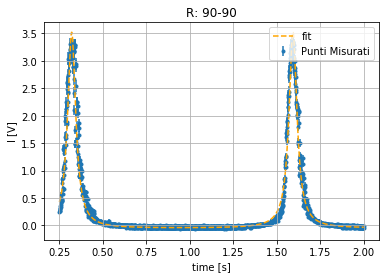

R = 0.92 | 0.95
f theory = 46.64564980955998
f fit    = 11.918384017714118 +- 0.10351240137107
cr theory = 882.825271908952
cr fit    = 58.56983636670373 +- 0.752087963782092


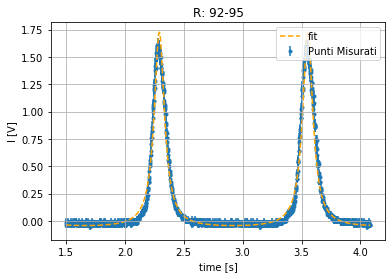

R = 0.95 | 0.95
f theory = 61.2409150194047
f fit    = 19.404320365803354 +- 0.06357865294320467
cr theory = 1520.9999999999973
cr fit    = 153.60090822573255 +- 2.098156490616676


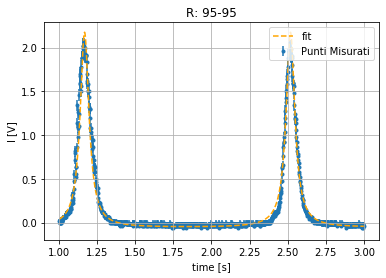

In [131]:
for T in range(len(name)):
    R1 = R_m[T][0]
    R2 = R_m[T][1]
    df= pd.read_csv(name[T])
    t = np.asarray(df.iloc[:,0])
    CH2  = np.asarray(df.iloc[:,2])

    X = t
    Y = CH2
    sY = 0.03*CH2 + div[T]
    [coo,b,a,phi,c],pcov = s.optimize.curve_fit(Airy_fit,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = (bounds_min[T],bounds_max[T]))
    [scoo,sb,sa,sphi,sc] = np.sqrt(np.diag(pcov))

    x = np.linspace(np.min(X),np.max(X),10000)
    y = Airy_fit(x,coo,b,a,phi,c)

    plt.errorbar(X,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    plt.plot(x,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

    plt.title(title[T])
    plt.xlabel('time [s]')
    plt.ylabel('I [V]')
    plt.grid()
    plt.legend(loc = 'upper right')

    f,sf = f_fit(coo,scoo = scoo)
    cr,scr = cr_fit(coo,scoo = scoo)
    theory = f_th(R1,R2),cr_th(R1,R2)
    
    A = '{} +- {}'.format(f,sf)
    B = '{} +- {}'.format(cr,scr)
    
    Finesse_fit = np.append(Finesse_fit,A)
    C_Ratio_fit = np.append(C_Ratio_fit,B)
    Finesse_th = np.append(Finesse_th,theory[0])
    C_Ratio_th= np.append(C_Ratio_th,theory[1])
    
    #print(coo,b,a,phi,c)
    print('R =',R1,'|',R2)
    print('f theory =', theory[0])
    print('f fit    =',A)
    print('cr theory =', theory[1])
    print('cr fit    =',B)
    plt.show()

In [132]:
Results = pd.DataFrame({'':title,'F Theory':Finesse_th,'Finesse fit':Finesse_fit,'CR Theory':C_Ratio_th,'Contrast Ratio fit':C_Ratio_fit})
Results

,,F Theory,Finesse fit,CR Theory,Contrast Ratio fit
0,R: 80-85,16.266714,10.555881319032423 +- 0.11687328730304952,108.240761,46.15951233433388 +- 0.4753740074539964
1,R: 85-85,19.309369,15.287852904665787 +- 0.08069809134281045,152.111111,95.72251852724774 +- 0.9286679499729236
2,R: 90-90,29.803765,22.89320899852626 +- 0.05388936737595803,361.000000,213.40933149959133 +- 1.8615517611614982
3,R: 92-95,46.645650,11.918384017714118 +- 0.10351240137107,882.825272,58.56983636670373 +- 0.752087963782092
4,R: 95-95,61.240915,19.404320365803354 +- 0.06357865294320467,1521.000000,153.60090822573255 +- 2.098156490616676


In [14]:
# Pt3 Formule e costanti

def Ordine(t1,t2):
    n = 2/( (t1-t2)*(t1+t2) )
    return n

def lenght(n,L):
    d = n*L/2
    return d